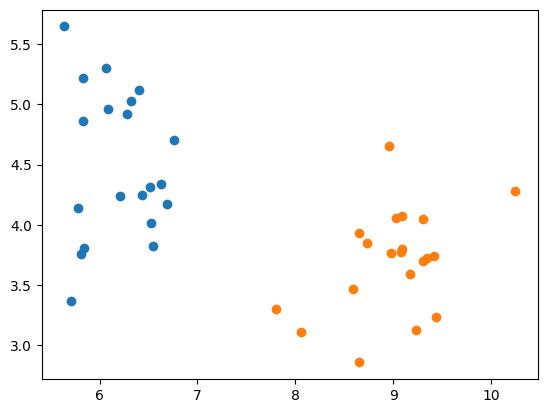

In [1]:
import numpy as np
import matplotlib.pyplot as plt
labels = 2

no = 20

xs = []
ys = []
ins = []
ls = []

max_dist = 4

a = 1/max_dist**2

# intensity equation:
# min(0, -a*x^2+1) = intensity


for i in range(labels):
	x = np.random.uniform(0, 20)
	y = np.random.uniform(0, 20)
	#intensity = np.random.uniform(150, 255)
	x_values = np.random.normal(x,0.5, size=no)
	y_values = np.random.normal(y, 0.5, size=no)
	dists = np.sqrt((x_values-x)**2+(y_values-y)**2)
	intensity_values = np.minimum(0, -a*dists**2+1)
	#intensity_values = np.random.normal(intensity, size=no)
	xs.append(x_values)
	ys.append(y_values)
	ins.append(intensity_values)
	ls.append(np.full(no, i))
	plt.plot(x_values, y_values, 'o')

plt.show()





In [2]:
import numpy as np
#np.random.normal(0, 1, 1000)
random_float = np.random.uniform(0, 10)
print(random_float)


0.9631353255594466


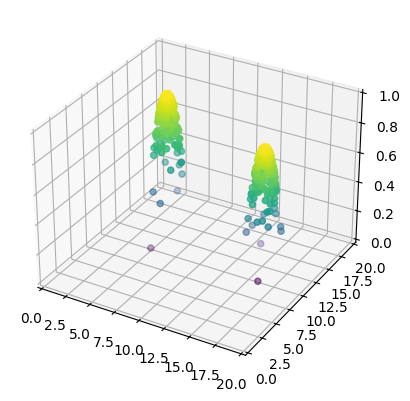

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
labels = 2
no = 300



file = open("data.csv", "w")

file.write("time,label,x,y,ins\n")

xs = []
ys = []
ins = []
ls = []

max_dist = 2
a = 1/max_dist**2

# intensity equation:
# min(0, -a*x^2+1) = intensity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(labels):
	x = np.random.uniform(0, 20)
	y = np.random.uniform(0, 20)
	z = np.random.uniform(0, 20)
	
	x_values = np.random.normal(x, 0.5, size=no)
	y_values = np.random.normal(y, 0.5, size=no)
	
	dists = np.sqrt((x_values-x)**2 + (y_values-y)**2)
	intensity_values = np.maximum(0, -a*dists**2 + 1)


	# print("X: ", x_values)
	# print("Y: ", y_values)
	# print("Dists: ", dists)
	# print("Intensity: ", intensity_values)
	
	xs.append(x_values)
	ys.append(y_values)
	ins.append(intensity_values)
	ls.append(np.full(no, i+1))

	ax.scatter(x_values, y_values, intensity_values, c=intensity_values, cmap='viridis')


for l, x, y, i in zip(ls, xs, ys, ins):
	for i, j, k, l in zip(x, y, i, l):
		file.write("0,{},{},{},{}\n".format(l, i, j, k))


ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 1)

file.close()

plt.show()


In [4]:
import pandas as pd

df = pd.read_csv('data.csv')

df['time'] = df['time'].astype(int)


ts = 10
speed = 0.8
for t in range(ts):
	# Find all points at time 0
	time_0_points = df[df['time'] == t]
		
	# Make a copy of label_points and add it with t=1
	label_points_t1 = time_0_points.copy()
	label_points_t1['time'] = t+1
	for label in time_0_points['label'].unique():
		label_points_t1.loc[label_points_t1['label'] == label, 'x'] += np.random.uniform(-speed,speed)
		label_points_t1.loc[label_points_t1['label'] == label, 'y'] += np.random.uniform(-speed,speed)
	# label_points_t1['x'] += np.random.uniform(-0.3,0.3)
	# label_points_t1['y'] += np.random.uniform(-0.3,0.3)

	df = pd.concat([df, label_points_t1], ignore_index=True)

df.to_csv('multi_data.csv', index=False)



In [10]:
import pandas as pd

df = pd.read_csv('data.csv')

df['time'] = df['time'].astype(int)


ts = 10
speed = 0.1
for t in range(ts):
	# Find all points at time 0
	time_0_points = df[df['time'] == t]
		
	# Make a copy of label_points and add it with t=1
	label_points_t1 = time_0_points.copy()
	label_points_t1['time'] = t+1
	for label in time_0_points['label'].unique():
		label_points_t1.loc[label_points_t1['label'] == label, 'x'] += np.random.uniform(-speed,speed)
		label_points_t1.loc[label_points_t1['label'] == label, 'y'] += np.random.uniform(-speed,speed)
	# label_points_t1['x'] += np.random.uniform(-0.3,0.3)
	# label_points_t1['y'] += np.random.uniform(-0.3,0.3)

	df = pd.concat([df, label_points_t1], ignore_index=True)

df = df.drop('label', axis=1)
df['time'] = df['time'].astype(float)

df.to_csv('multi_data.csv', index=False)

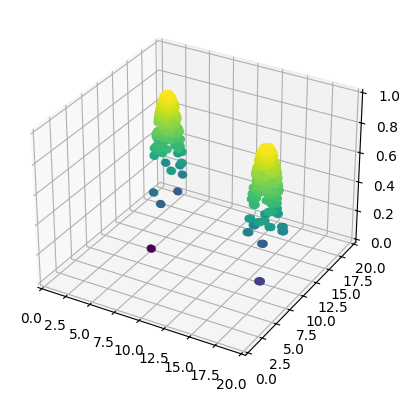

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
labels = 4
no = 50



df = pd.read_csv('multi_data.csv')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['x'], df['y'], df['ins'], c=df['ins'], cmap='viridis')


ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 1)

file.close()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


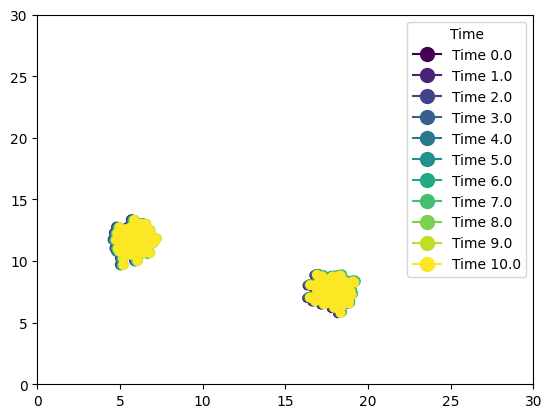

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
labels = 4
no = 50

df = pd.read_csv('multi_data.csv')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['x'], df['y'], c=df['time'], cmap='viridis')

ax.legend(title='Time')
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

# Get unique time values
unique_times = df['time'].unique()

# Create legend labels and handles
legend_labels = ['Time {}'.format(t) for t in unique_times]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(t/unique_times[-1]), markersize=10) for t in unique_times]


# Add legend
ax.legend(legend_handles, legend_labels, title='Time')

plt.show()

In [14]:
df = pd.read_csv('multi_data.csv')

objects = pd.DataFrame(columns=["id", "numpoints", "xpos", "ypos", "tlx", "tly", "brx", "bry"])

data = df[df["time"]==0]


id = 0

for label in data["label"].unique():
	pts = data[data['label']==label]
	tlx = pts['x'].min()
	tly = pts['y'].min()
	brx = pts['x'].max()
	bry = pts['y'].max()
	numpoints = pts['y'].count()
	xpos = pts['x'].mean()
	ypos = pts['y'].mean()
	obj = [id, numpoints, xpos, ypos, tlx, tly, brx, bry]
	objects.loc[len(objects)] = obj
	id += 1
	
objects




fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data['x'], data['y'], c=data['label'], cmap='viridis')



for _, obj in objects.iterrows():
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='red')
    ax.plot([brx, brx], [tly, bry], color='red')
    ax.plot([brx, tlx], [bry, bry], color='red')
    ax.plot([tlx, tlx], [bry, tly], color='red')
    xpos = obj['xpos']
    ypos = obj['ypos']
    print(xpos, ypos, tlx)
    ax.plot(xpos, ypos, 'w+')
    



ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Get unique time values
unique_times = data['label'].unique()

# Create legend labels and handles
legend_labels = ['{}'.format(t) for t in unique_times]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(t/unique_times[-1]), markersize=10) for t in unique_times]


# Add legend
ax.legend(legend_handles, legend_labels, title='Label')

plt.show()


KeyError: 'label'

In [17]:
df = pd.read_csv('multi_data.csv')

objects = pd.DataFrame(columns=["id", "numpoints", "xpos", "ypos", "tlx", "tly", "brx", "bry"])
tt = 10
data = df[df["time"]==tt]

df2 = pd.read_csv('objects.csv')

obs = df2[df2["time"]==tt]


id = 0

for label in data["label"].unique():
	pts = data[data['label']==label]
	tlx = pts['x'].min()
	tly = pts['y'].min()
	brx = pts['x'].max()
	bry = pts['y'].max()
	numpoints = pts['y'].count()
	xpos = tlx + (brx-tlx)/2
	ypos = tly + (bry-tly)/2
	obj = [id, numpoints, xpos, ypos, tlx, tly, brx, bry]
	objects.loc[len(objects)] = obj
	id += 1


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data['x'], data['y'], c=data['label'], cmap='viridis')



for _, obj in objects.iterrows():
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='red')
    ax.plot([brx, brx], [tly, bry], color='red')
    ax.plot([brx, tlx], [bry, bry], color='red')
    ax.plot([tlx, tlx], [bry, tly], color='red')
    xpos = obj['xpos']
    ypos = obj['ypos']
    ax.plot(xpos, ypos, 'w+')
    

for _, obj in obs.iterrows():
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='blue')
    ax.plot([brx, brx], [tly, bry], color='blue')
    ax.plot([brx, tlx], [bry, bry], color='blue')
    ax.plot([tlx, tlx], [bry, tly], color='blue')
    xpos = obj['xpos']
    ypos = obj['ypos']
    ax.plot(xpos, ypos, 'b+')

    



ax.set_xlim(-5, 25)
ax.set_ylim(-5, 25)

# Get unique time values
unique_times = data['label'].unique()

# Create legend labels and handles
legend_labels = ['{}'.format(t) for t in unique_times]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(t/unique_times[-1]), markersize=10) for t in unique_times]


# Add legend
ax.legend(legend_handles, legend_labels, title='Label')

plt.show()

KeyError: 'label'

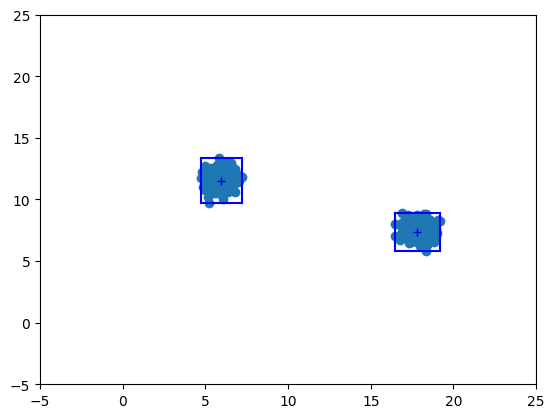

In [19]:
df = pd.read_csv('multi_data.csv')

objects = pd.DataFrame(columns=["id", "numpoints", "xpos", "ypos", "tlx", "tly", "brx", "bry"])
tt = 10
data = df[df["time"]==tt]

df2 = pd.read_csv('objects.csv')

obs = df2[df2["time"]==tt]


id = 0



fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data['x'], data['y'])



for _, obj in objects.iterrows():
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='red')
    ax.plot([brx, brx], [tly, bry], color='red')
    ax.plot([brx, tlx], [bry, bry], color='red')
    ax.plot([tlx, tlx], [bry, tly], color='red')
    xpos = obj['xpos']
    ypos = obj['ypos']
    ax.plot(xpos, ypos, 'w+')
    

for _, obj in obs.iterrows():
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='blue')
    ax.plot([brx, brx], [tly, bry], color='blue')
    ax.plot([brx, tlx], [bry, bry], color='blue')
    ax.plot([tlx, tlx], [bry, tly], color='blue')
    xpos = obj['xpos']
    ypos = obj['ypos']
    ax.plot(xpos, ypos, 'b+')

    



ax.set_xlim(-5, 25)
ax.set_ylim(-5, 25)

plt.show()